In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("Zoo.csv")

In [4]:
df_cleaned = df.drop(columns=["animal name"])
df_cleaned

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
X = df_cleaned.drop(columns=["type"])
y = df_cleaned["type"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [12]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

C:\Users\Abinash Nayak\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [17]:
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [18]:
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='distance')

In [19]:
y_pred = best_knn.predict(X_test_scaled)

In [20]:
y_pred

array([5, 2, 4, 2, 1, 1, 4, 6, 1, 4, 7, 1, 1, 7, 1, 2, 3, 6, 1, 1, 2],
      dtype=int64)

In [21]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")


In [22]:
# Print results
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [23]:
# Visualize decision boundaries
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
best_knn.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='distance')

In [24]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

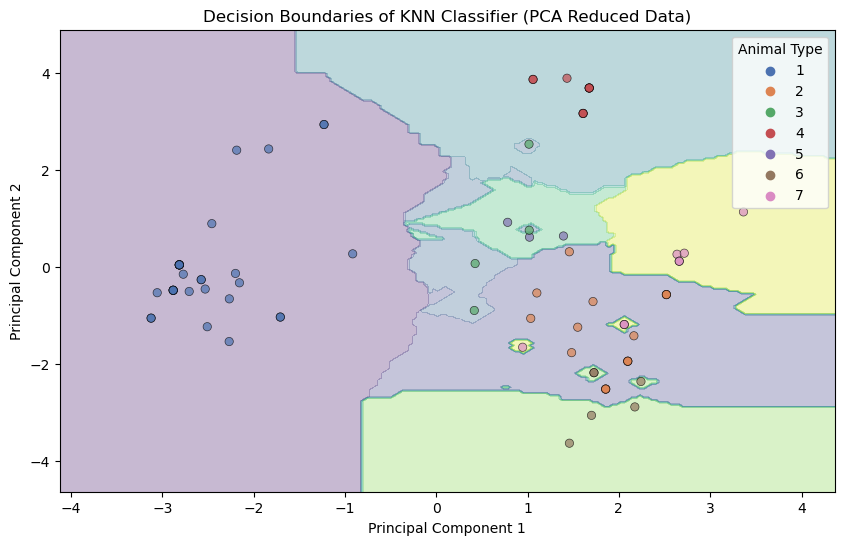

In [26]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="deep", edgecolor="k", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decision Boundaries of KNN Classifier (PCA Reduced Data)")
plt.legend(title="Animal Type")
plt.show()